# LetsGrowMore - Data Science Internship
## Task 5: Exploratory Data Analysis - Terrorism
### Author: Geetanjali Kotkar
- Here we perform exploratory data analysis on Global Terrorism dataset & try to find the hot zone of Terrorism. 

## Import Libraries

In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To ignore warnings

import warnings as wg
wg.filterwarnings("ignore")

## Import Data

In [3]:
#Read the data
df=pd.read_csv('C:\\Users\\kotka\\Downloads\\globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1",low_memory=False)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.020000e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.020000e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.020000e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


## Exploring the Data

In [6]:
df.shape

(181691, 135)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.003238e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.383523e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990000e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.010000e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.010000e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020000e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [10]:
#Rename the columns
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day',
                   'country_txt':'Country','region_txt':'Region', 
                   'latitude':'latitude', 'longitude':'longitude', 'summary':'summary',
                   'motive':'motive', 'provstate':'State','city':'City', 'attacktype1_txt':'Attacktype',
                   'targtype1_txt':'Targtype', 'gname':'Group','weaptype1':'Weapon',
                   'nkill':'Kill', 'nwound':'Wound', 'targtype1':'target1', 'nhours':'hours'},inplace=True)
df.head(3)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
#select useful columns
data = df[['Year','Month','Day','Country','Region', 
                   'latitude','longitude','summary',
                  'motive','State','City', 'Attacktype',
                  'Targtype','Group','Weapon',
                   'Kill','Wound','target1','hours']]

In [12]:
#Check shape of the Data
data.shape

(181691, 20)

In [13]:
#Check details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   Region      181691 non-null  object 
 5   latitude    177135 non-null  float64
 6   longitude   177134 non-null  float64
 7   summary     115562 non-null  object 
 8   motive      50561 non-null   object 
 9   State       181270 non-null  object 
 10  City        181257 non-null  object 
 11  Attacktype  181691 non-null  object 
 12  Targtype    181691 non-null  object 
 13  Group       181691 non-null  object 
 14  Weapon      181691 non-null  int64  
 15  Kill        171378 non-null  float64
 16  Wound       165380 non-null  float64
 17  target1     181691 non-null  int64  
 18  target1     181055 non-null  object 
 19  ho

In [14]:
#Check null values
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
latitude        4556
longitude       4557
summary        66129
motive        131130
State            421
City             434
Attacktype         0
Targtype           0
Group              0
Weapon             0
Kill           10313
Wound          16311
target1            0
target1          636
hours         177628
dtype: int64

In [15]:
#Replace the null values
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)

In [16]:
#Statistical Data
data.describe()

,Year,Month,Day,latitude,longitude,Weapon,Kill,Wound,target1,hours
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,4063.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,6.447325,2.266860,2.883296,8.439719,-46.793933
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,2.173435,11.227057,34.309747,6.653838,82.800405
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,1.000000,-99.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,5.000000,0.000000,0.000000,3.000000,-99.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,6.000000,0.000000,0.000000,4.000000,-99.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,6.000000,2.000000,2.000000,14.000000,0.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,13.000000,1570.000000,8191.000000,22.000000,999.000000


In [17]:
#Check unique values
data.nunique()

Year              47
Month             13
Day               32
Country          205
Region            12
latitude       48322
longitude      48039
summary       112492
motive         14490
State           2855
City           36674
Attacktype         9
Targtype          22
Group           3537
Weapon            12
Kill             205
Wound            238
target1           22
target1        86006
hours             35
dtype: int64

## Exploratory Data Analysis
### Data Visualization

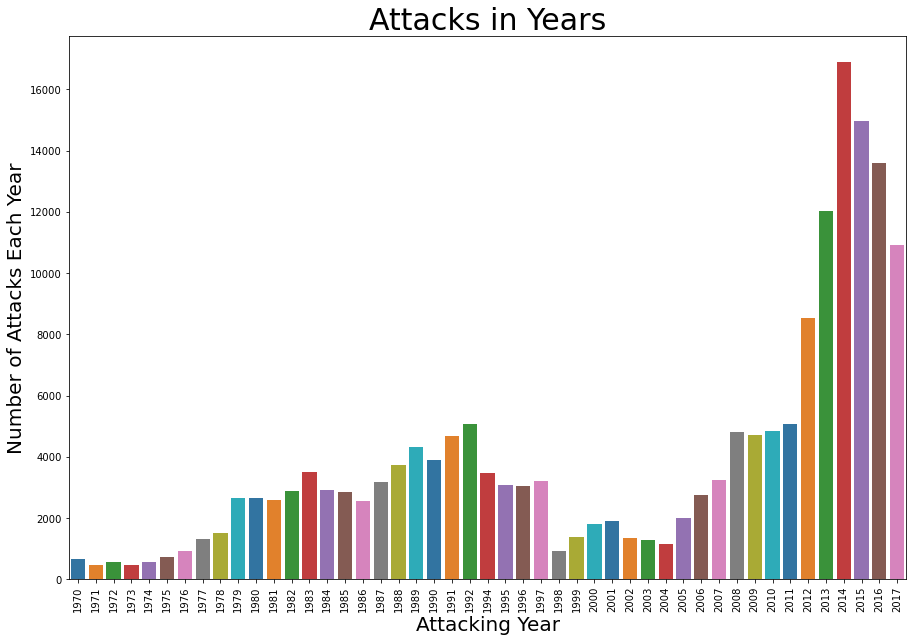

In [18]:
#Attacks in year
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize = (15,10))
sns.barplot(x= year, y= years_count, palette = 'tab10')

plt.xticks(rotation = 90)
plt.xlabel('Attacking Year', fontsize = 20)
plt.ylabel('Number of Attacks Each Year', fontsize = 20)
plt.title('Attacks in Years', fontsize = 30)
plt.show()

In [19]:
attacks= data['Year'].value_counts(dropna= False).sort_index()
attacks= pd.DataFrame(attacks).reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.tail()

,Attacks
Year,
2013,12036
2014,16903
2015,14965
2016,13587
2017,10900


- The above graph shows attacks between 1970- 2017. In the year 2014 attacks were maximum.

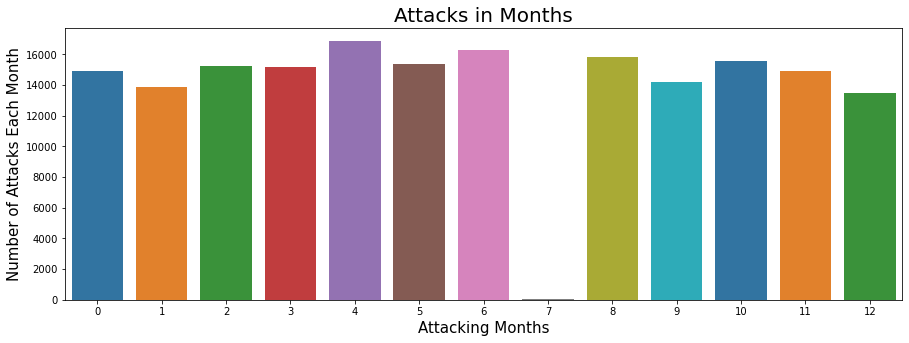

In [20]:
#Attacks in month

Month= data['Month'].unique()
Months_count = data['Month'].value_counts(dropna = False).sort_index()
positions = (0,1,2,3,4,5,6,7,8,9,10,11,12)
labels= ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec')

plt.figure(figsize= (15,5))
sns.barplot(x= Month, y= Months_count, palette= 'tab10')

plt.xticks(rotation= 0)

plt.xlabel('Attacking Months', fontsize= 15)
plt.ylabel('Number of Attacks Each Month', fontsize= 15)
plt.title('Attacks in Months', fontsize= 20)
plt.show()

- The most of the Attacks were in month of May

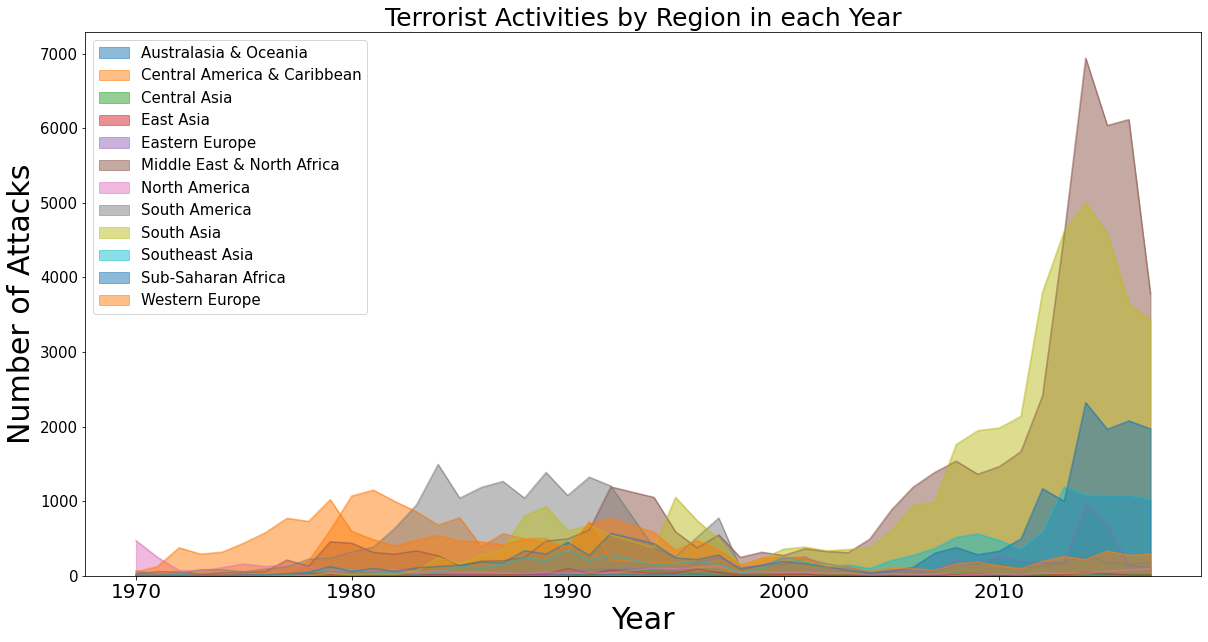

In [21]:
#Terrorist activities by Region every year

pd.crosstab(data.Year, data.Region).plot(kind='area', stacked= False, figsize=(20,10))

plt.xticks(fontsize= 20)
plt.yticks(fontsize= 15)

plt.title('Terrorist Activities by Region in each Year', fontsize= 25)
plt.ylabel('Number of Attacks', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.legend(loc='upper left', fontsize=15)
plt.show()

- Here the graph shows the Middle East & North Africa Region has more attacks.

In [22]:
attack = data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [23]:
data.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

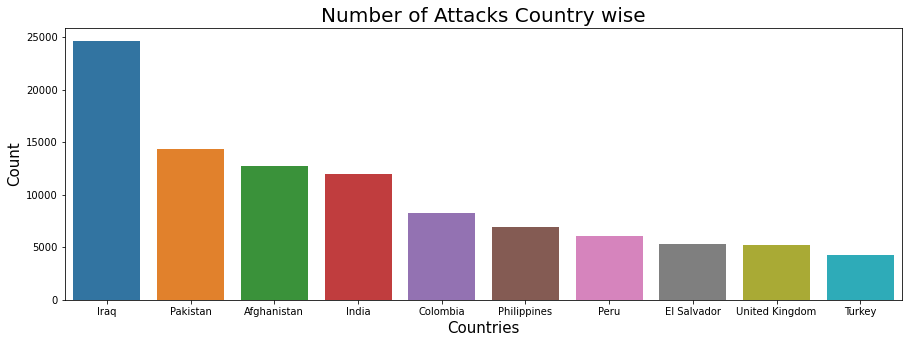

In [24]:
#Finding Number of attack country wise
plt.figure(figsize= (15,5))

sns.barplot(attack.index,attack)
plt.title('Number of Attacks Country wise', fontsize=20)
plt.xlabel('Countries', fontsize= 15)
plt.ylabel('Count',fontsize= 15)
plt.show()

- From above plot it seems that Country Iraq has more Attacks.

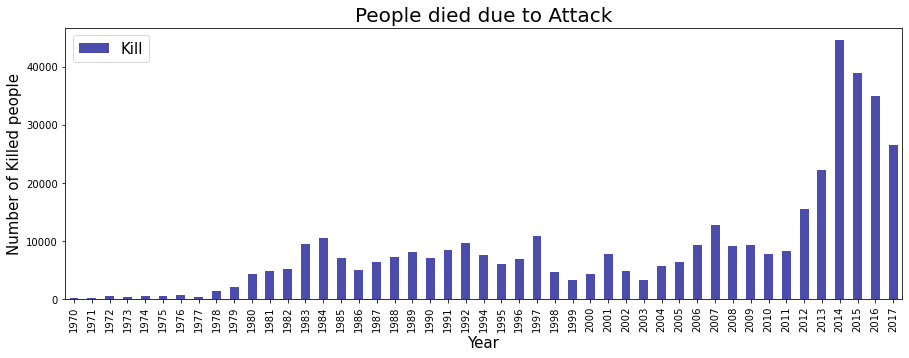

In [31]:
#Finding people died due to attack every year
df=data[['Year','Kill']].groupby(['Year']).sum()

#plot
df.plot(kind= 'bar',alpha= 0.7, color= 'darkblue', figsize=(15,5))
plt.title('People died due to Attack',fontsize= 20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Killed people', fontsize= 15)
plt.legend(loc='upper left', fontsize= 15)
plt.show()

- In year 2014 the higher number of peoples are died.

In [28]:
Kill_region = (data.groupby('Region').sum()['Kill'])
Kill_region

Region
Australasia & Oceania             150.0
Central America & Caribbean     28708.0
Central Asia                     1000.0
East Asia                        1152.0
Eastern Europe                   7415.0
Middle East & North Africa     137642.0
North America                    4916.0
South America                   28849.0
South Asia                     101319.0
Southeast Asia                  15637.0
Sub-Saharan Africa              78386.0
Western Europe                   6694.0
Name: Kill, dtype: float64

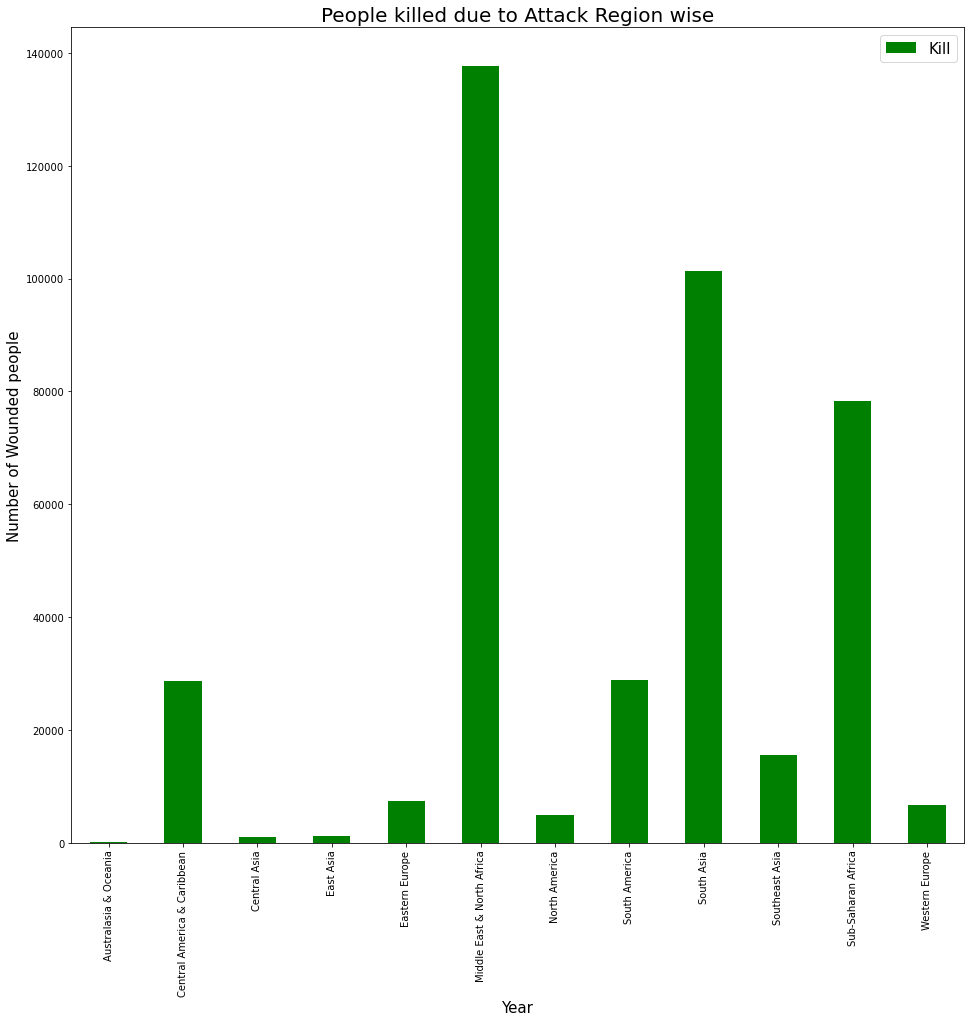

In [35]:
#Plot
plt.figure(figsize=(16,15))
Kill_region.plot(kind='bar',color= 'green')

plt.title('People killed due to Attack Region wise',fontsize= 20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Wounded people', fontsize= 15)
plt.legend(loc= 0, fontsize= 15)
plt.show()

- From graph, the Middle East & North Africa Region has more Attacks.

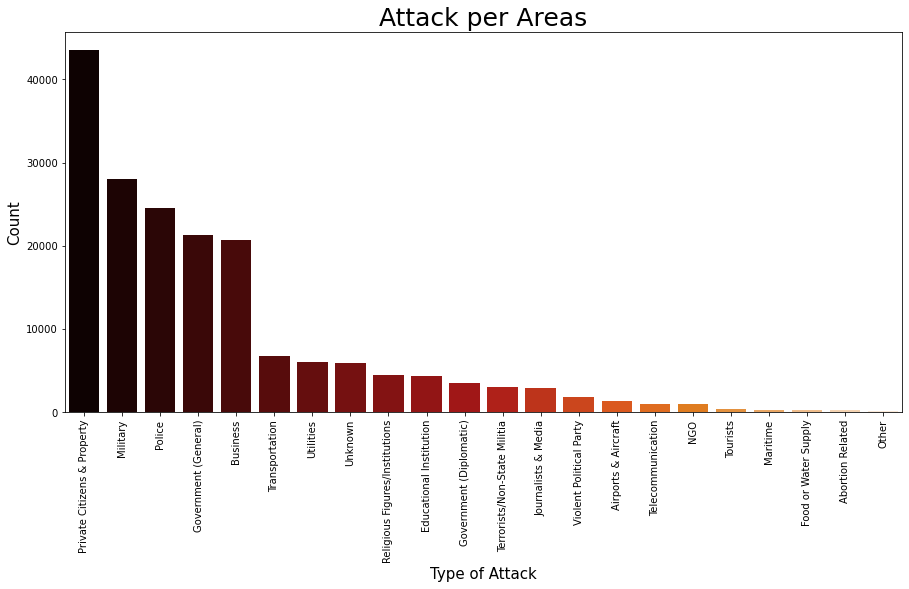

In [33]:
#Finding Attack from different types of areas

plt.figure(figsize=(15,7))
sns.countplot(data.Targtype, order= data.Targtype.value_counts().index, palette= 'gist_heat')

plt.xticks(rotation= 90)
plt.xlabel('Type of Attack',fontsize=15)
plt.ylabel('Count', fontsize= 15)
plt.title('Attack per Areas', fontsize= 25)
plt.show()

- The attacks on Private Citizens & Property is high compared to other attacks.

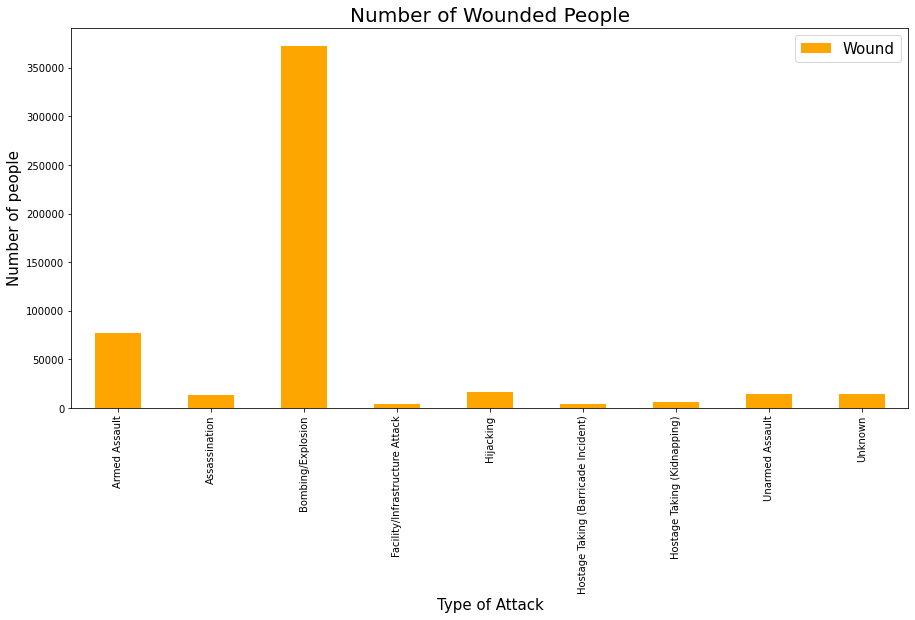

In [44]:
#Finding Number of people wounded

data[['Attacktype','Wound']].groupby(['Attacktype'], axis=0).sum().plot(kind='bar', figsize=(15,7), color=['orange'])
plt.xlabel('Type of Attack',fontsize=15)
plt.ylabel('Number of people', fontsize= 15)
plt.title('Number of Wounded People', fontsize= 20)
plt.legend(fontsize= 15)
plt.show()

- The number of Wounded people are high in Bombing/Explosion attack type.

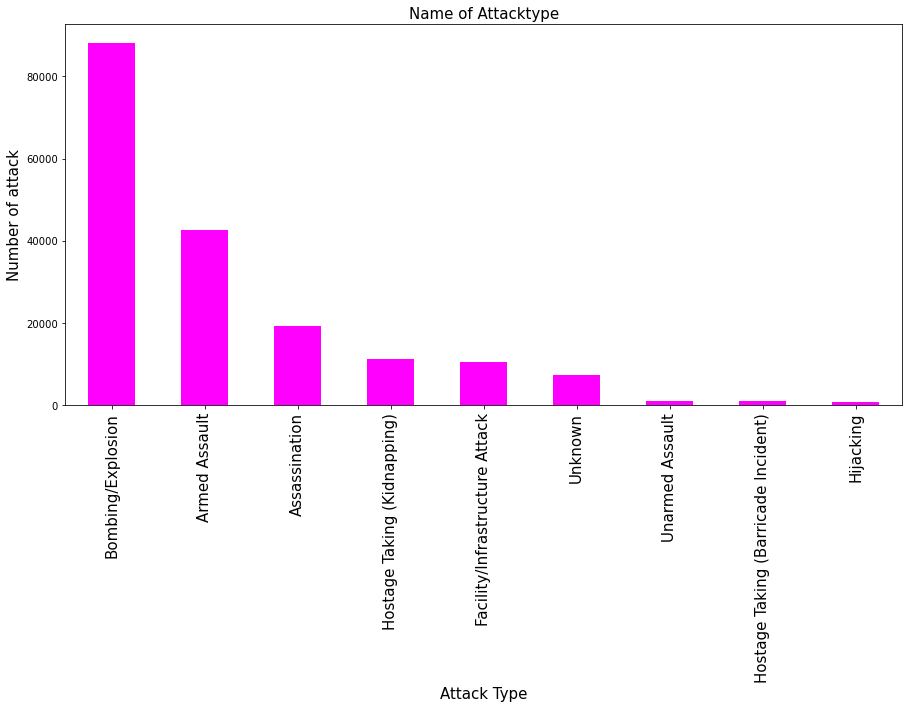

In [73]:
data['Attacktype'].value_counts().plot(kind='bar', figsize=(15,7), color='magenta')
plt.xticks(rotation=90 ,fontsize= 15)
plt.xlabel('Attack Type',fontsize=15)
plt.ylabel('Number of attack', fontsize= 15)
plt.title('Name of Attacktype', fontsize= 15)
plt.show()

- The Most of the Attacktype is Bombing/Explosion.

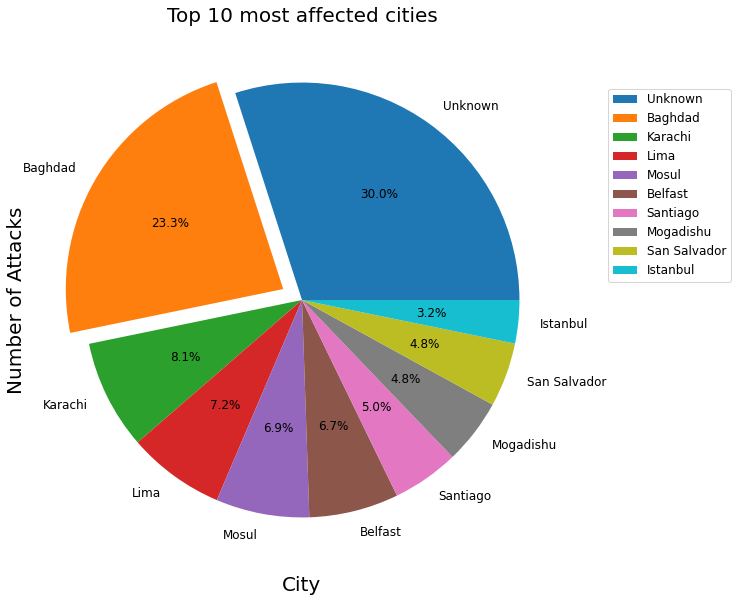

In [59]:
#Check top cities affected by Terrorisom

explode = (0,0.1, 0, 0, 0, 0, 0, 0, 0, 0)
data['City'].value_counts().to_frame().sort_values('City', axis= 0, 
                                                   ascending= False).head(10).plot(kind= 'pie', subplots =True,
                                                   explode = explode, figsize=(10,10), 
                                                   textprops={'fontsize':12, 'Weight':'light', 'color':'k'}, 
                                                   autopct= '%1.1f%%')
plt.xticks(rotation= 90)
plt.xlabel('City',fontsize=20)
plt.ylabel('Number of Attacks', fontsize= 20)
plt.title('Top 10 most affected cities', fontsize= 20)
plt.legend(loc='upper right', bbox_to_anchor = (1.3,0.9), fontsize= 12)
plt.show()

- The Beghdad is the most affected city by Terror attacks.

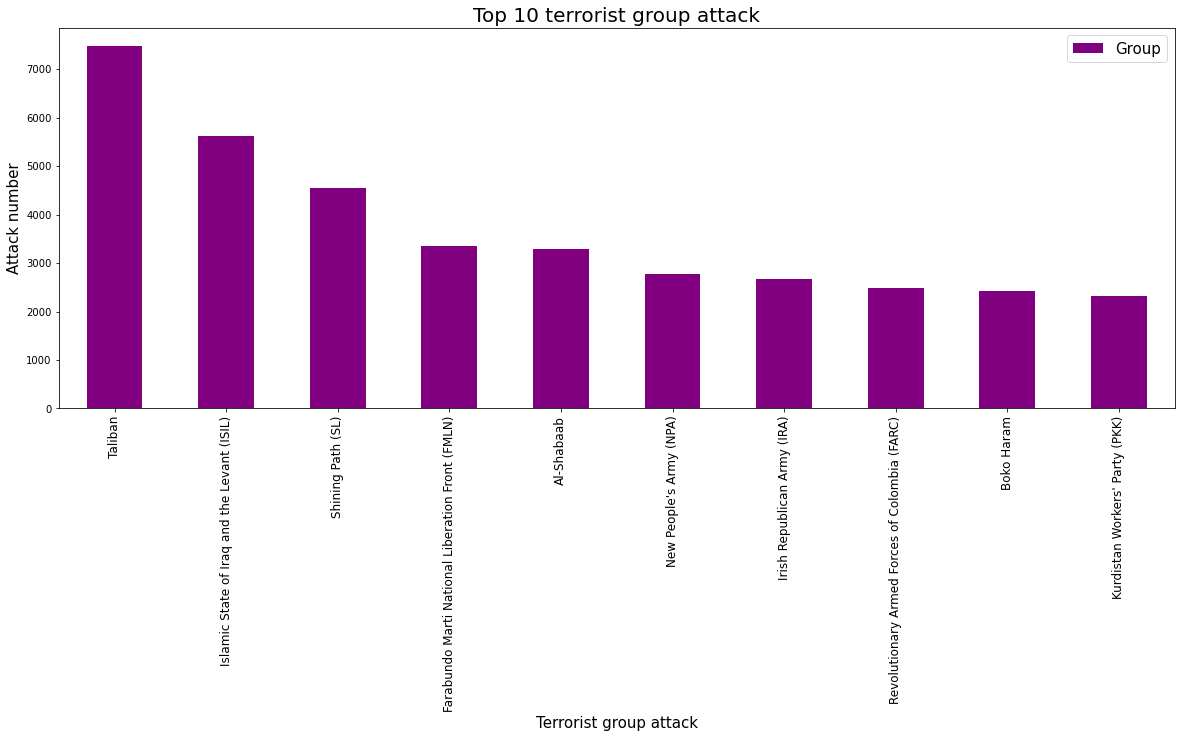

In [63]:
#Top 10 Terrorist Groups as per attack Count

data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind= 'bar',color="purple", figsize=(20,7))

plt.title('Top 10 terrorist group attack', fontsize= 20)
plt.xlabel('Terrorist group attack',fontsize=15)
plt.ylabel('Attack number', fontsize= 15)
plt.xticks(fontsize= 12)
plt.legend(fontsize= 15)
plt.show()

- The Taliban Terrorist group has maximum number of attatcks.

In [62]:
#Top 10 Terrorist groups as per Kills
df=data[['Group', 'Country', 'Kill']]
df=df.groupby(['Group', 'Country'], axis= 0).sum().sort_values('Kill',ascending= False).drop('Unknown').reset_index().head(10)
data['Group'].value_counts().to_frame().drop('Unknown').head(10)
df

,Group,Country,Kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [66]:
#Number of people lost their lives
Kill= data.loc[:,'Kill']
print('Number of people Killed by terror attack:', int(sum(Kill.dropna())))

Number of people Killed by terror attack: 411868


In [68]:
#Number of kill as per Attack Type
typekill = data.pivot_table(columns= 'Attacktype', values= 'Kill', aggfunc='sum')
typekill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [70]:
#Number of kill by Country wise
countrykill= data.pivot_table(columns='Country', values= 'Kill', aggfunc= 'sum')
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


## Conclusions

- Country with most Attack: Iraq
- City with most Attack   : Beghdad
- Region with most Attack : Middle East & North Africa
- Year with most Attack   : 2014
- Month with most Attack  : May
- Group with most Attack  : Taliban
- Most Attack types       : Bombing/Explosion

## Thank you !